<a href="https://colab.research.google.com/github/Shiwani123693/Brain_Tumor_Segmentation_BCP/blob/main/Week_2/Python_libraries/Tensorflow_Keras/tensorflow_keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow/Keras Basics Notebook
### *Build your first neural networks & CNNs*

# Exercise Solution


## Importing Required Libraries

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Build a Simple Neural Network

In [8]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Train Model on Random Data
(Demo purpose only)

In [9]:
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5016 - loss: 0.7265
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5124 - loss: 0.7094
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4847 - loss: 0.7205
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4884 - loss: 0.7108
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4724 - loss: 0.7123


## Build a Simple CNN

In [10]:
## 1.) Solution of 1 and 2 part

cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Dropout added
    ## more layers can be added similarly
     layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Dropout added
    ## more layers can be added similarly
     layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Dropout added
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Dropout added
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout before output layer
    layers.Dense(1, activation='sigmoid')
])

cnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,761 (69.38 KB)

 Trainable params: 17,761 (69.38 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN on Dummy Images

In [11]:
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X, y, epochs=3)

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.5499 - loss: 0.6971
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5378 - loss: 0.7191
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4891 - loss: 0.7153


## Build a U-Net Block (Foundation for Segmentation Models)

In [12]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

inp = layers.Input((128,128,1))
out = conv_block(inp, 16)
unet_demo = models.Model(inp, out)
unet_demo.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 16)   │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 2,480 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

# Build the encoder part of U-Net using conv_block
### 3.) part solution


In [13]:
def encoder_block(x, filters):
    x = conv_block(x, filters)
    p = layers.MaxPooling2D((2,2))(x)
    return x, p

inp = layers.Input((128,128,1))
c1, p1 = encoder_block(inp, 16)
c2, p2 = encoder_block(p1, 32)
c3, p3 = encoder_block(p2, 64)

encoder_model = models.Model(inp, [c1, c2, c3, p3])
encoder_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,792 (280.44 KB)

 Trainable params: 71,792 (280.44 KB)

 Non-trainable params: 0 (0.00 B)

# Train CNN on a real dataset (MNIST or CIFAR10).
### 4.) part solution

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Simple CNN for MNIST
cnn_mnist = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_mnist.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9137 - loss: 0.2822 - val_accuracy: 0.9849 - val_loss: 0.0444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9837 - val_loss: 0.0474
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9915 - loss: 0.0276 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9934 - loss: 0.0193 - val_accuracy: 0.9915 - val_loss: 0.0290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9897 - val_loss: 0.0343


# 5. Plot training curves (loss & accuracy) using matplotlib.

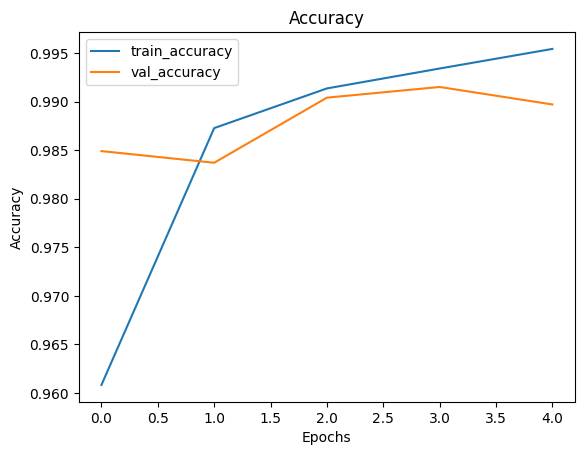

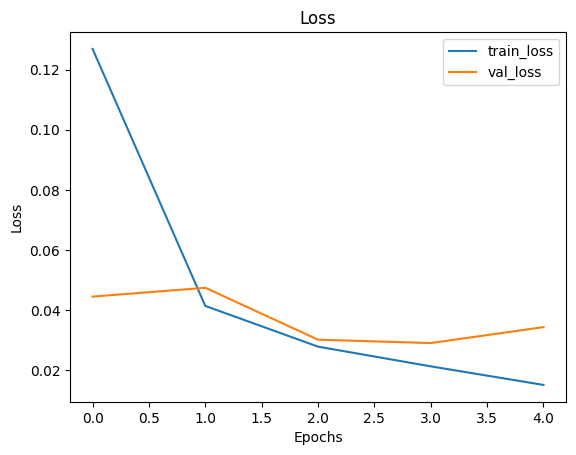

In [15]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## **Exercises**
1. Modify the CNN to include **Dropout**.
2. Add more convolution layers to increase accuracy.
3. Build the **encoder part** of U-Net using conv_block.
4. Train CNN on a real dataset (MNIST or CIFAR10).
5. Plot training curves (loss & accuracy) using matplotlib.
